## UN Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
continents = pd.read_csv("../data/continents.csv")

In [4]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [6]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


Inspect the first 10 rows

In [8]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


Inspect the last 10 rows:

In [10]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


Drop unneeded column of Value Footnotes:

In [12]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [13]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


Rename remaining columns to 'Country' and 'GDP_Per_Capita'

In [15]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country'})

In [16]:
gdp_df = gdp_df.rename(columns={'Value': 'GDP_Per_Capita'})

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


Determine rows and columns of gdp_df and data types of columns

In [19]:
gdp_df.shape

(7662, 3)

In [20]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


Year should be categorical instead of numeric, therefore change the data type to categorical

In [22]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

In [23]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   object 
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), object(2)
memory usage: 179.7+ KB


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?


In [25]:
gdp_df['Year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2022', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990'], dtype=object)

In [26]:
gdp_df['Year'].value_counts()


Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

According to the data above, I notice that the later years have more observations in general than the earlier years. 2022 seems to be out of order though.

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [29]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [30]:
gdp_df['Country'].nunique()

242

In [31]:
gdp_df['Country'].value_counts().tail()

Country
Kosovo                       15
Sint Maarten (Dutch part)    14
Turks and Caicos Islands     12
Somalia                      10
Djibouti                     10
Name: count, dtype: int64

According to the data and functions above, there are 242 countries represented in the gdp_df dataset, and the countries least represented are listed in the .tail() function above. These countries have so few observations probably because these are poorer countries and there were less or no observations taken from them for some of the years.

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.


In [34]:
gdp_2021 = gdp_df[gdp_df['Year']=='2021']

In [35]:
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 


In [37]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?


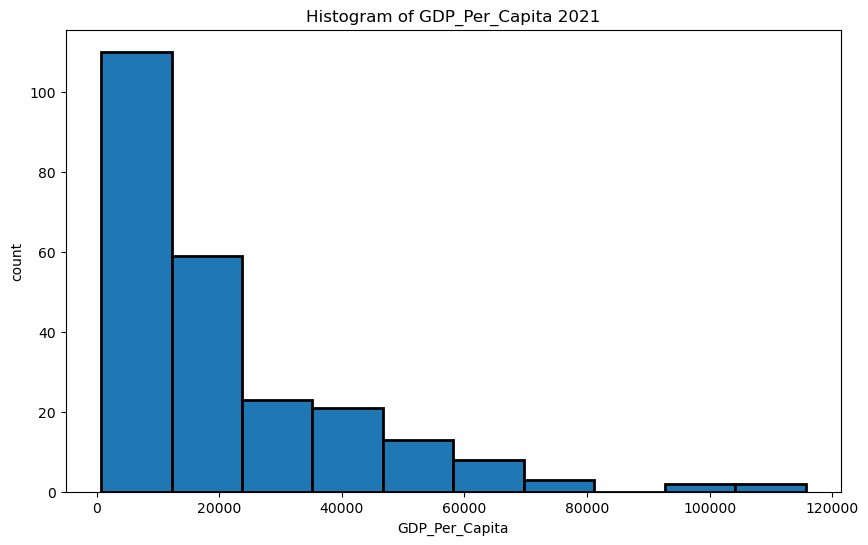

In [39]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
    edgecolor='black',
    linewidth=2
);                              
plt.xlabel('GDP_Per_Capita')                            
plt.ylabel('count')
plt.title('Histogram of GDP_Per_Capita 2021');

According to the histogram above, the shape of the distribution of the GDP per capita in 2021 is unimodal and extremely right skewed with outliers in the high end of the distribution.

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.


In [42]:
gdp_2021.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515
...,...,...,...
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686


The top five countries by GDP per capita in 2021 are Luxembourg, Singapore, Ireland, Qatar, and Bermuda. The bottom five countries by GDP per capita in 2021 are Niger, Somalia, Dem. Rep. Congo, Central African Republic and Burundi.

13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.


In [45]:
gdp_pivoted = gdp_df.pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')

In [46]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,NaN
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [47]:
gdp_pivoted = gdp_pivoted.loc[:,'1990':'2021']

In [48]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2122.830759,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3543.824946,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,3901.724829,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11227.950407,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11270.701045,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,6950.287692,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,5985.683247,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14516.157508,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429


In [49]:
gdp_pivoted = gdp_pivoted.dropna(subset = ['1990', '2021'])

In [50]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3543.824946,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,3901.724829,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11227.950407,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11270.701045,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8011.050095,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2953.929836,2897.564287,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,6950.287692,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14516.157508,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [52]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2021']-gdp_pivoted['1990'])/gdp_pivoted['1990']

C:\Users\solid\AppData\Local\Temp\ipykernel_18928\2971708120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2021']-gdp_pivoted['1990'])/gdp_pivoted['1990']


In [53]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,15.865334
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,43.980435
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,202.379544
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,24.921232
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,2.049878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2897.564287,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,0.950043
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,406.251608
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,75.720074


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?


In [55]:
gdp_pivoted[gdp_pivoted['Percent_Change']<0]

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Barbados,14097.395550,13519.721406,12710.419327,12772.787194,12993.923523,13225.754385,13726.032320,14353.120119,14864.666058,14884.601843,...,15489.761185,15441.219761,15789.451218,16156.517559,16198.962160,16003.857426,15954.802665,13805.777541,13754.802423,-2.430187
Brunei,70358.724094,70439.053204,71781.102896,70154.424727,70570.964514,71966.097409,72320.987984,69660.186006,67770.172490,68366.663177,...,65534.683160,63131.186248,62170.087023,59980.988745,60173.051134,59650.231527,61424.364313,61603.550804,60127.023689,-14.542192
Burundi,1175.155086,1209.388158,1190.067435,1153.541309,1103.167298,956.490976,880.309412,867.284265,891.699844,862.006680,...,824.610523,831.294839,781.579287,764.336602,750.787616,740.448223,729.658463,711.355263,714.066712,-39.236385
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,764.051500,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,-30.243599
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5105.169838,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,-35.406695
Dem. Rep. Congo,1750.169739,1550.763705,1346.747222,1128.593145,1034.123387,998.688314,969.808663,900.967796,865.606612,805.277881,...,944.640247,999.072134,1032.571865,1021.327198,1023.539833,1048.246447,1059.892111,1044.071214,1073.643271,-38.654906
Fragile and conflict affected situations,4864.814075,4350.885189,4111.205699,3783.352920,3333.698724,3152.588947,3105.770527,3149.284983,3218.818872,3245.559989,...,4621.263024,4563.187603,4518.143936,4563.257454,4600.657232,4636.533677,4647.290257,4357.621312,4333.881033,-10.913738
Gabon,17559.006114,18134.816076,17109.401561,17318.162261,17497.649823,17903.782156,18091.047292,18655.653044,18825.361170,16716.372068,...,14655.365552,14785.398669,14892.035790,14783.078117,14478.130305,14254.461697,14478.001722,13903.288955,13814.495200,-21.325301
Guinea-Bissau,1998.173206,2057.174302,2020.741837,1997.076379,1998.836536,2035.223783,2224.748653,2324.843826,1641.030749,1627.075350,...,1718.862075,1690.091136,1748.029233,1811.300971,1872.309281,1851.886546,1890.533103,1803.630591,1831.383229,-8.347123


19 countries have experienced a negative percent change in GDP per capita from 1990 to 2021.

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2021. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.


In [95]:
gdp_pivoted_sorted = gdp_pivoted.sort_values('Percent_Change', ascending=False)

In [97]:
gdp_pivoted_sorted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,936.419751,893.097341,1159.738622,1240.908573,1394.786465,1578.049440,2530.198770,6084.623075,7242.224926,8749.425868,...,29143.021802,28106.198389,24563.500604,21566.057048,19617.844705,17764.969630,16240.369810,15132.379974,14637.007350,1463.081870
China,1423.896348,1534.705272,1731.657215,1949.534268,2178.924057,2391.477116,2601.363426,2812.711135,3004.427342,3206.730026,...,11101.938930,11851.404218,12612.351651,13399.137320,14243.532611,15133.995618,15977.763828,16296.609379,17657.495181,1140.082904
East Asia & Pacific (excluding high income),2191.972060,2322.907488,2520.737656,2742.360622,2979.737360,3221.096140,3458.675406,3641.511465,3623.587749,3791.281266,...,10375.856695,10984.965475,11608.539002,12263.235967,12968.864325,13709.856140,14408.611619,14458.047242,15415.447708,603.268440
East Asia & Pacific (IDA & IBRD),2218.031627,2350.517029,2550.731679,2775.055703,3015.333968,3259.565698,3499.876392,3684.752889,3666.469204,3836.000860,...,10492.824395,11108.380904,11738.607553,12400.285149,13113.364220,13862.310358,14568.640670,14618.556038,15586.699395,602.726652
Myanmar,581.613311,579.378753,597.202183,635.107184,669.375053,708.504878,746.426565,781.596072,816.526211,875.418497,...,3409.648895,3658.593538,3748.294222,4109.557412,4312.947389,4556.281168,4829.536707,4947.093961,4032.625653,593.351678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,764.051500,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,-30.243599
United Arab Emirates,105893.626059,101048.696239,99106.791640,95524.456926,97475.980854,99510.350680,99602.617418,100956.706467,95185.305822,92368.813265,...,62354.823203,64334.091552,68076.635891,71244.585815,71182.370717,71550.554332,71782.153836,67668.286641,69733.793774,-34.147317
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5105.169838,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,-35.406695


In [102]:
gdp_pivoted_sorted = gdp_pivoted_sorted.loc[:, '1990':'2021']

Equatorial Guinea had the highest GDP per capita % change from 1990 to 2021 followed by China.

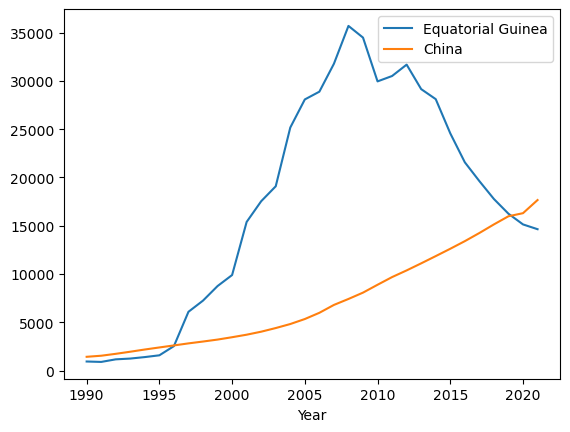

In [104]:
gdp_pivoted_sorted.loc['Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', kind='line')
gdp_pivoted_sorted.loc['China'].plot(x='Year', y='GDP_Per_Capita', kind='line')
plt.legend()
plt.show()

Equatorial New Guinea had the higher % change in gdp per capita and a maximum between 2005 and 2010 but decreased from that point until 2021, whereas China's gdp per capita had a steady increase all the way from 1990 until 2021.

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [108]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.


In [111]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [115]:
gdp_df = pd.merge(gdp_df, continents, on = 'Country', how = 'inner')

In [117]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.


In [124]:
gdp_df = gdp_df.drop_duplicates(subset = 'Country')

In [128]:
gdp_df['Continents'].unique().value_counts()

KeyError: 'Continents'